# Suppose we are a freelance data scientist, and the editor of a leading scientific journal has just hired us to visualize their entire catalog of articles. The scientific journal is having a fundraising event. The editor would like a series of visualizations that can be used in a presentation as well as on posters and flyers to promote the event.

# We are going to use a new neural-network-inspired contextual topic model based on Bidirectional Encoder Representations from Transformers (BERT). This contextual topic model interests us because each document is augmented with a vector representation obtained from BERT embedding. The contextual topic model has the potential to address the limitations of the bag of words (document-to-word matrix) representations. We will also be using the new Optimizing and Comparing Topic models Is Simple (OCTIS) library. OCTIS includes multiple topic modeling algorithms as well as coherence metrics and has the ability to perform hyperparameter optimization. 

In [1]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
! pip install octis

     |████████████████████████████████| 129 kB 3.1 MB/s 
     |████████████████████████████████| 100 kB 5.5 MB/s 
     |████████████████████████████████| 79 kB 3.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
     |████████████████████████████████| 170 kB 54.6 MB/s 
     |████████████████████████████████| 16.3 MB 43.6 MB/s 
     |████████████████████████████████| 3.8 MB 38.4 MB/s 
     |████████████████████████████████| 1.2 MB 52.9 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
     |████████████████████████████████| 6.5 MB 49.5 MB/s 
     |████████████████████████████████| 895 kB 55.2 MB/s 
     |████████████████████████████████| 596 kB 51.7 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233369 sha256=66c6a7b1a85e1e7ea323a90b819392b8c536907486781dcd611aef0dedd380ac
  Stored in directory: /root/.cache/pip/wheels/cd/e8/1e/bf95cf256e4d3ffc94289ab508c49d

# One of the biggest datasets to train a topic model for categorizing a catalog of articles, is DBLP Dataset which is also called Citation Network Dataset. To know more about this dataset:

https://www.aminer.org/citation

# And therefore, we will be using this dataset and the best part is that this dataset is already available in OCTIS (Optimizing and Comparing Topic models Is Simple), therefore we will be loading this dataset using OCTIS library. 

In [3]:
from octis.dataset.dataset import Dataset

In [4]:
data = Dataset()
data.fetch_dataset("DBLP")

In [5]:
data

# OCTIS library also offers us several models to train too and here as we already know that we will be using Contextualized Topic Model (CTM) which will yield trained embeddings from BERT primarily or any of it's variants which is already available in OCTIS library and we will be using that. 

In [6]:
from octis.models.CTM import CTM

In [7]:
ctm_model = CTM(num_topics=64,inference_type="combined")

In [8]:
ctm_output = ctm_model.train_model(data)

In [9]:
def create_topic_word_freq_dict(topic_word_matrix, vocabulary, topic_number, number_top_words):
  word_freq_dict = {}
  topic = topic_word_matrix[topic_number]
  for i in topic.argsort()[:-number_top_words - 1:-1]:
    word_freq_dict[vocabulary[i]] = topic[i].round(2)
  return word_freq_dict

Topic  1


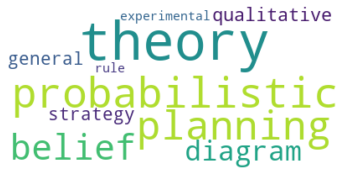

Topic  2


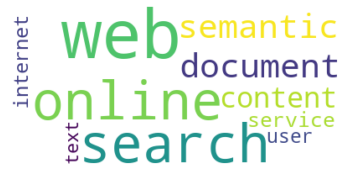

Topic  3


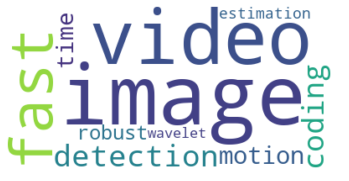

Topic  4


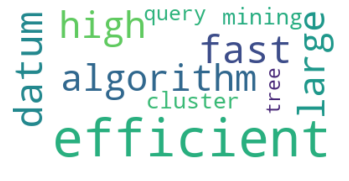

Topic  5


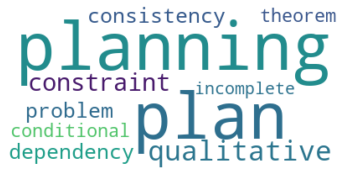

Topic  6


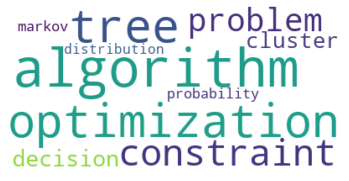

Topic  7


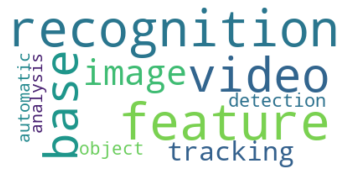

Topic  8


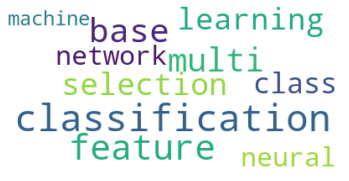

Topic  9


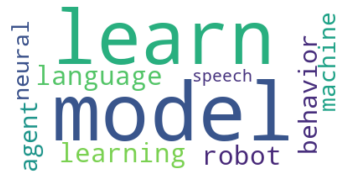

Topic  10


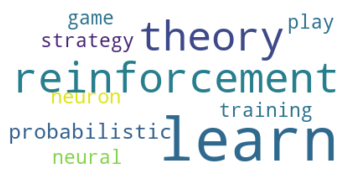

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

num_topics = 10
#Generate topic word clouds
topic_number = 0 # Initialize counter
while topic_number < num_topics:
    topic_words_freq = create_topic_word_freq_dict(ctm_output['topic-word-matrix'], data.get_vocabulary(), topic_number, 10)
    topic_number += 1    
    print("Topic ", topic_number)
    # Generate Word Cloud for topic using frequencies
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(topic_words_freq) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()